## Import packages

In [2]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt


%pylab inline
floatX = theano.config.floatX

Populating the interactive namespace from numpy and matplotlib


## Make dataset, initialize parameters

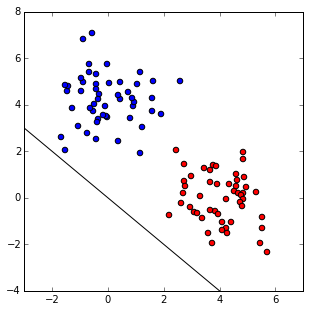

In [16]:
n_data = 50
data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data)
data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data)
data_x = np.vstack([data1,data2])
data_y = np.hstack([np.ones((n_data,)), -np.ones((n_data,))])
shared_x = theano.shared(np.asarray(data_x, dtype=floatX), name='data_x')
shared_y = theano.shared(np.asarray(data_y, dtype=floatX), name='data_y')

w = theano.shared(np.ones((2,1), dtype=floatX), name='w')
b = theano.shared(np.zeros((1,), dtype=floatX), name='b')

def draw_state():
    plt.rcParams['figure.figsize']=(5,5)
    plt.scatter(data1[:,0],data1[:,1],30,'r')
    plt.scatter(data2[:,0],data2[:,1],30,'b')
    [x1min,x1max,x2min,x2max] = plt.axis()
    x1val = np.arange(x1min,x1max,0.1)
    wval = w.get_value(borrow=True)
    bval = b.get_value(borrow=True)
    plt.plot(x1val, -(wval[0]*x1val+bval)/wval[1], 'k')
    plt.axis([x1min,x1max,x2min,x2max])
    plt.show()
    
draw_state()

## Build logistic regression model
###$$P(y_i|x_i;w,b) = \frac{1}{1+exp(-(wx_i+b)y_i)}$$
###$$L = E[-log(P(y_i|x_i;w,b))]$$###

In [17]:
x = T.matrix('x')
y = T.vector('y')
p_y = 1/(1+T.exp(-(T.dot(x, w)+b)*T.reshape(y,(-1,1))))
loss = T.mean(-T.log(p_y)) + 0.01*w.norm(2)

## Gradient Descent Learning

In [18]:
wgrad = T.grad(loss, w)
bgrad = T.grad(loss, b)
lr = 0.1

train = theano.function([], loss, givens=[(x,shared_x), (y,shared_y)], updates=[(w,w-lr*wgrad), (b,b-lr*bgrad)])

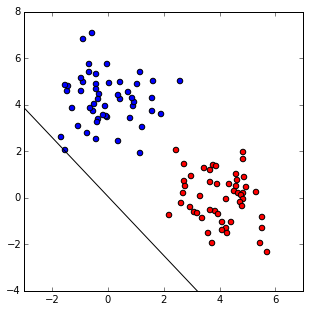

loss: 2.14695000648, w norm: 1.28011834621


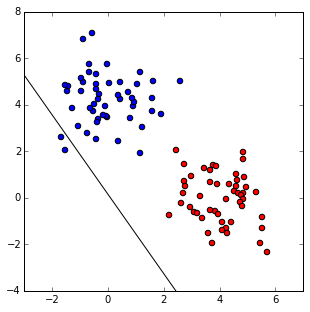

loss: 1.70013964176, w norm: 1.16936922073


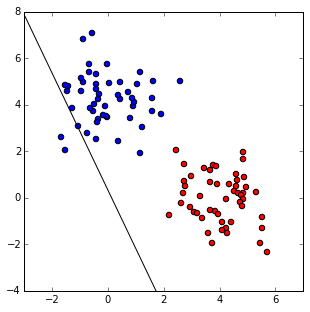

loss: 1.2856875658, w norm: 1.08729660511


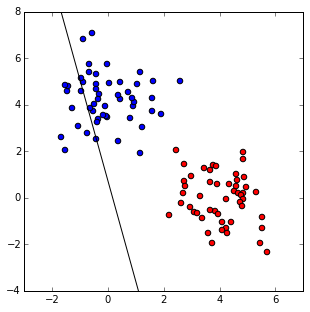

loss: 0.928076446056, w norm: 1.03557252884


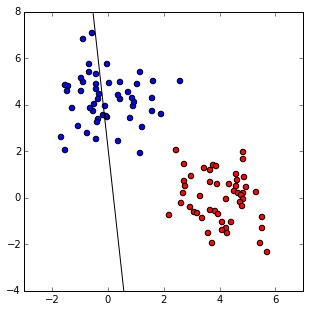

loss: 0.653151035309, w norm: 1.00938117504


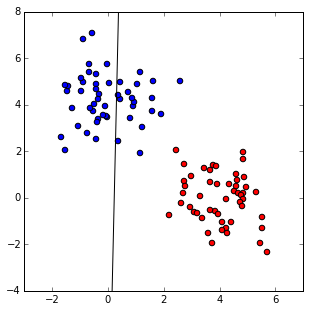

loss: 0.46698358655, w norm: 0.999981820583


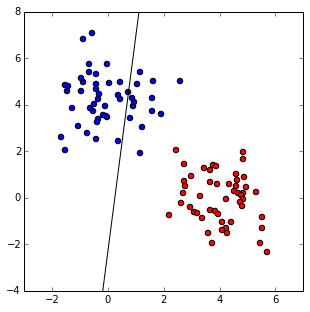

loss: 0.349593698978, w norm: 1.00007212162


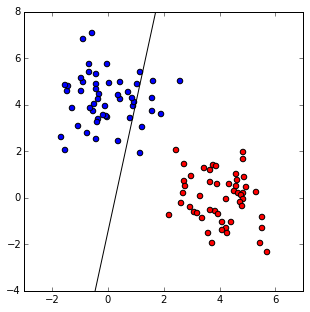

loss: 0.275227874517, w norm: 1.00534904003


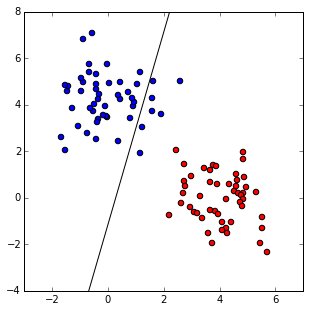

loss: 0.22619690001, w norm: 1.01349520683


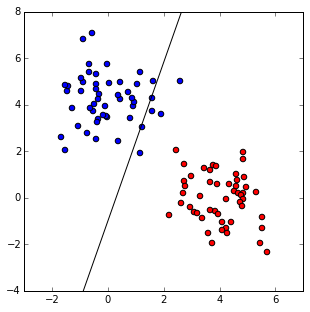

loss: 0.192405298352, w norm: 1.02323973179


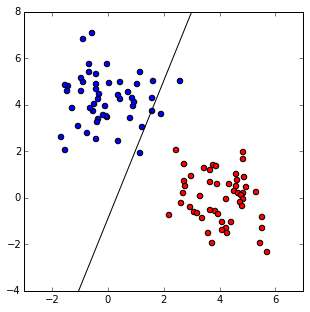

loss: 0.168175175786, w norm: 1.03385949135


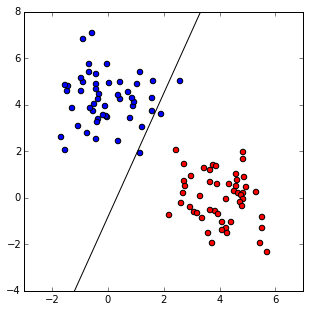

loss: 0.150202453136, w norm: 1.04492914677


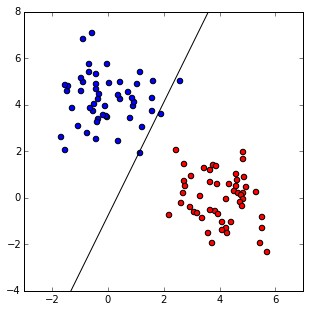

loss: 0.136481434107, w norm: 1.05619156361


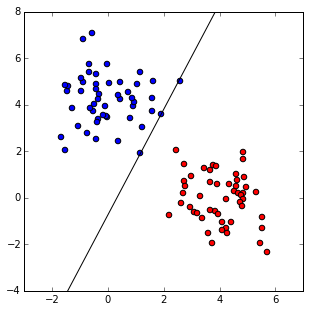

loss: 0.12574480474, w norm: 1.06748890877


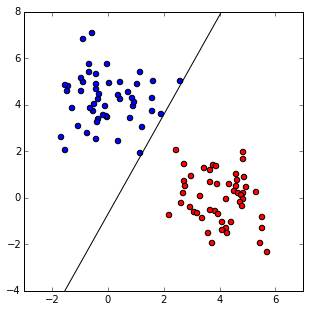

loss: 0.117162741721, w norm: 1.07872259617


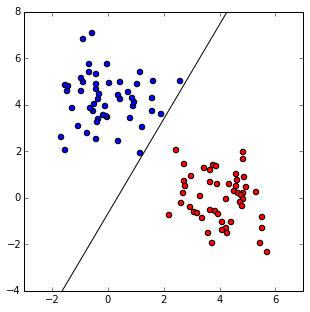

loss: 0.110174536705, w norm: 1.08983135223


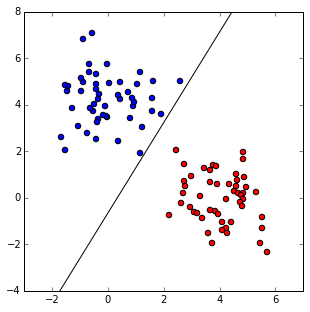

loss: 0.104390770197, w norm: 1.10077738762


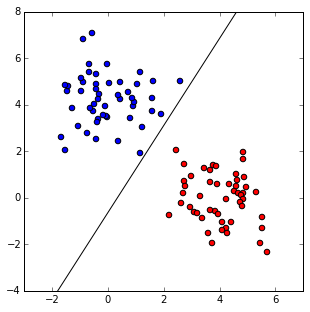

loss: 0.0995343625546, w norm: 1.11153829098


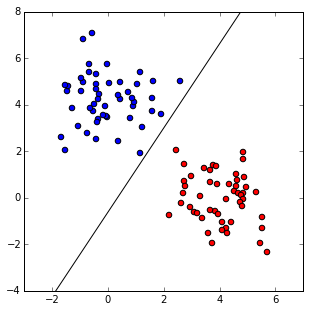

loss: 0.0954039469361, w norm: 1.12210130692


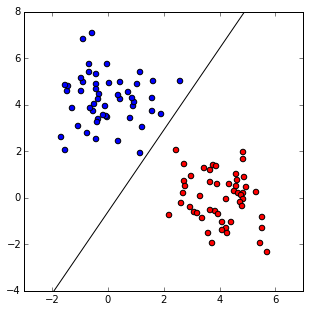

loss: 0.091850310564, w norm: 1.13246023655


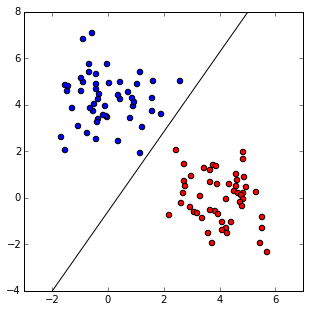

loss: 0.0887610986829, w norm: 1.14261305332


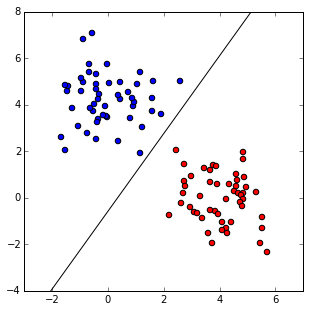

loss: 0.0860503613949, w norm: 1.15256094933


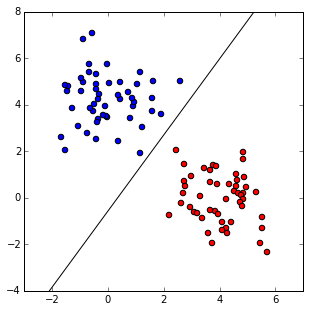

loss: 0.0836514532566, w norm: 1.16230678558


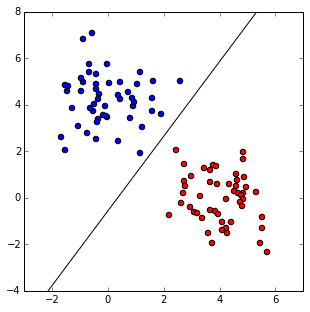

loss: 0.0815120786428, w norm: 1.17185461521


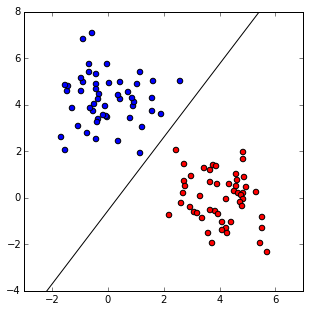

loss: 0.0795906931162, w norm: 1.18120932579


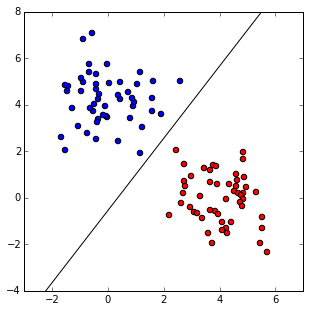

loss: 0.0778539776802, w norm: 1.19037628174


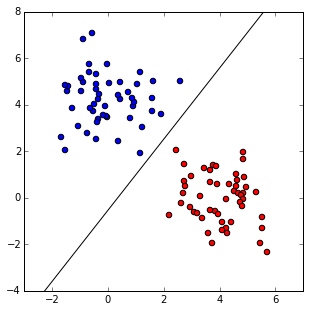

loss: 0.0762749686837, w norm: 1.19936096668


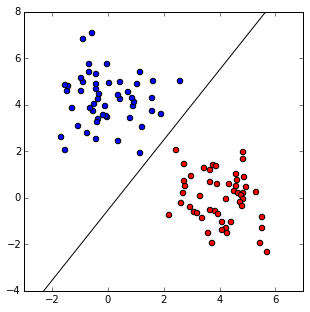

loss: 0.074831597507, w norm: 1.20816910267


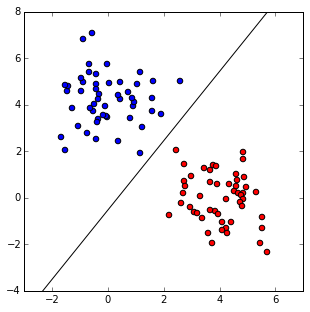

loss: 0.0735057145357, w norm: 1.21680629253


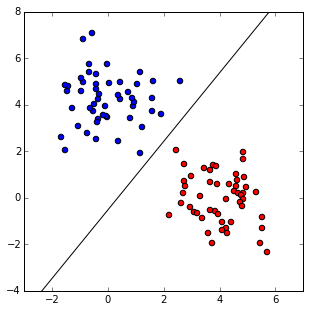

loss: 0.0722822472453, w norm: 1.22527801991


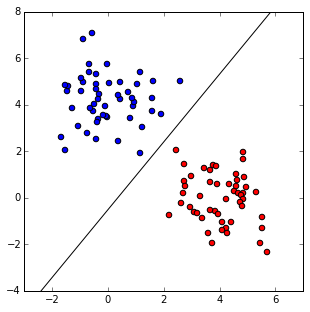

loss: 0.0711486041546, w norm: 1.23358976841


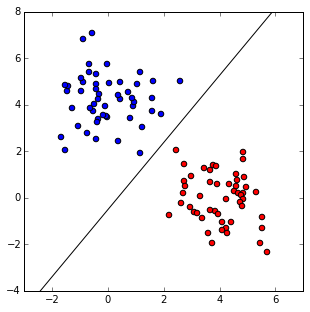

loss: 0.0700941905379, w norm: 1.24174702168


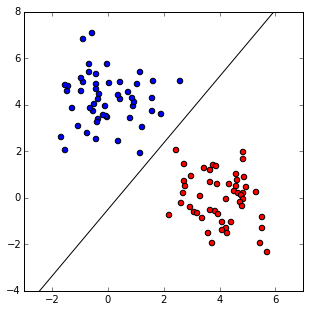

loss: 0.0691100135446, w norm: 1.24975454807


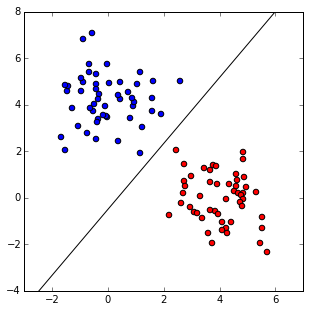

loss: 0.0681884139776, w norm: 1.2576174736


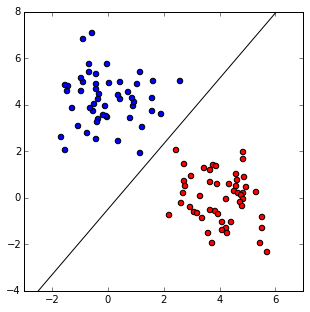

loss: 0.0673228725791, w norm: 1.26534056664


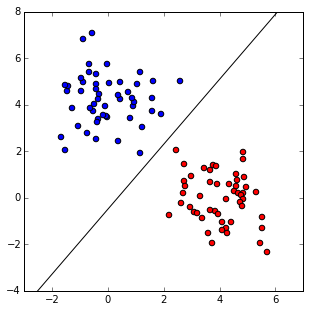

loss: 0.0665077269077, w norm: 1.27292823792


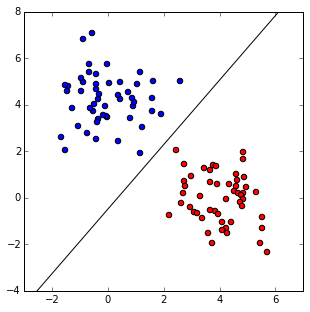

loss: 0.0657380819321, w norm: 1.2803850174


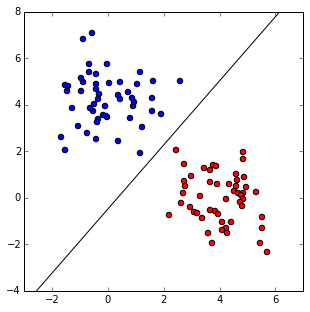

loss: 0.0650097280741, w norm: 1.28771495819


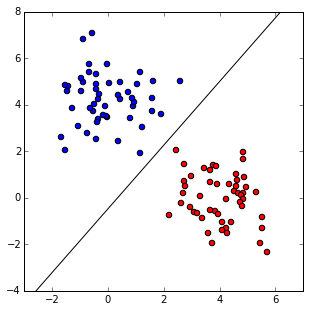

loss: 0.0643189251423, w norm: 1.29492211342


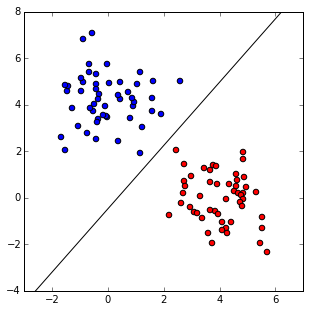

loss: 0.0636624246836, w norm: 1.30201017857


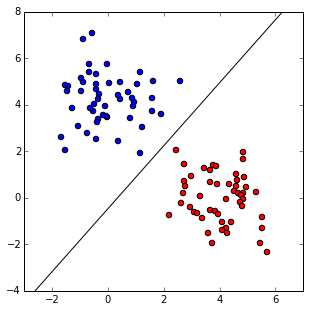

loss: 0.0630373582244, w norm: 1.30898308754


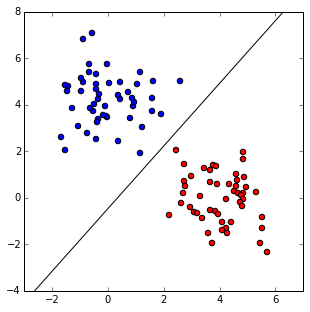

loss: 0.0624412037432, w norm: 1.31584405899


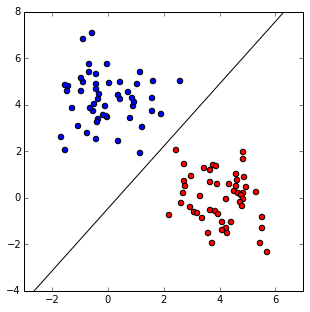

loss: 0.0618716850877, w norm: 1.32259654999


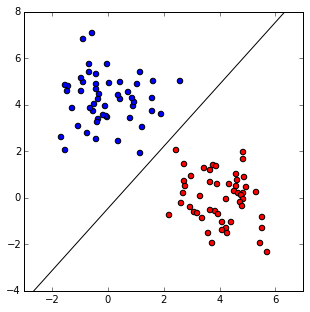

loss: 0.0613268017769, w norm: 1.32924389839


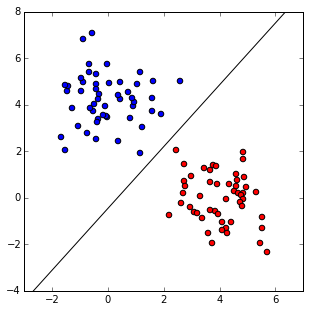

loss: 0.0608047582209, w norm: 1.33578920364


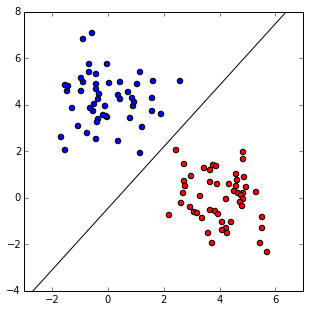

loss: 0.0603039413691, w norm: 1.34223532677


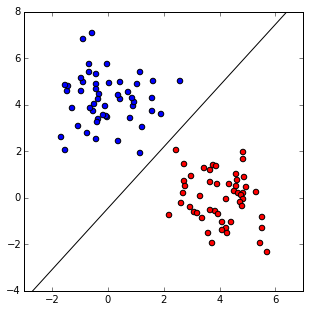

loss: 0.0598228983581, w norm: 1.34858512878


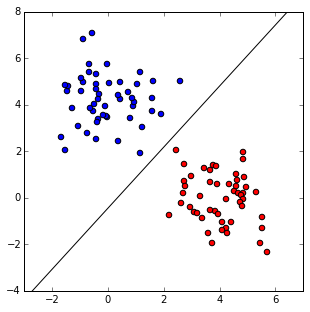

loss: 0.0593603290617, w norm: 1.35484147072


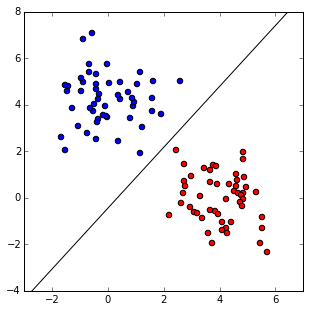

loss: 0.0589150302112, w norm: 1.36100685596


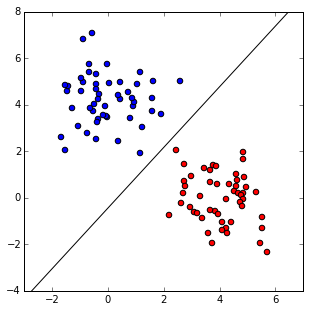

loss: 0.0584859326482, w norm: 1.3670835495


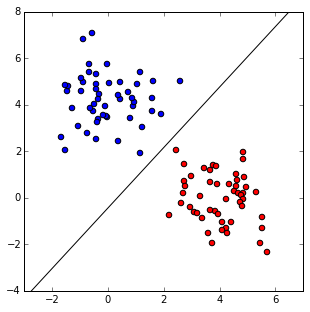

loss: 0.058072052896, w norm: 1.37307441235


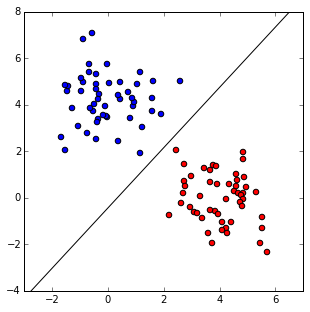

loss: 0.0576724857092, w norm: 1.37898159027


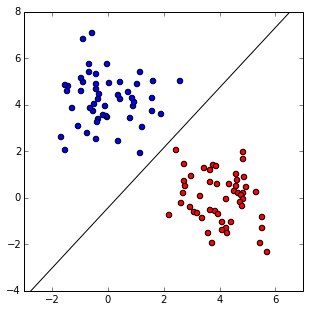

loss: 0.0572864301503, w norm: 1.38480710983


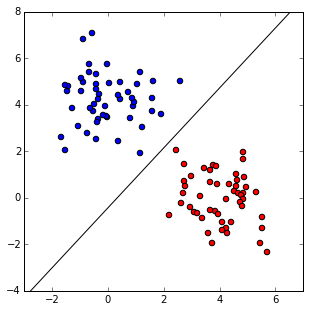

loss: 0.0569131299853, w norm: 1.39055323601


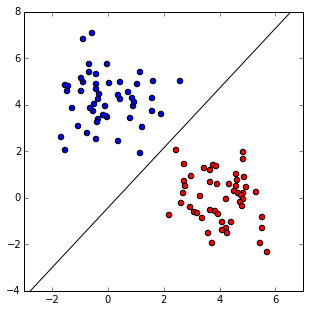

loss: 0.0565518736839, w norm: 1.39622211456


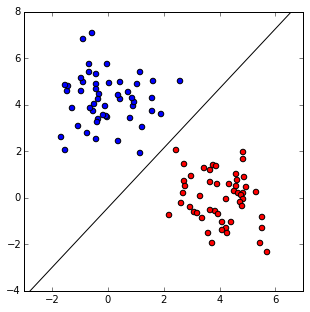

loss: 0.0562020391226, w norm: 1.40181553364


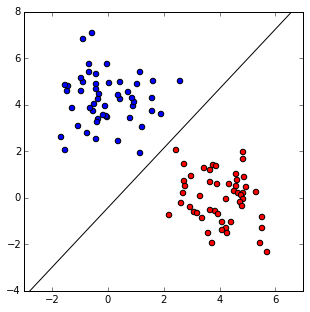

loss: 0.0558630265296, w norm: 1.40733575821


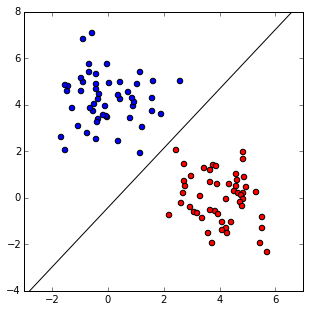

loss: 0.055534299463, w norm: 1.41278409958


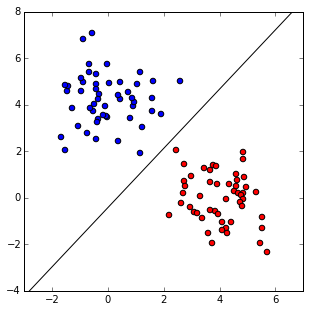

loss: 0.0552153512836, w norm: 1.41816282272


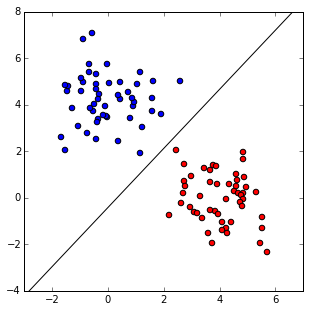

loss: 0.0549057126045, w norm: 1.42347335815


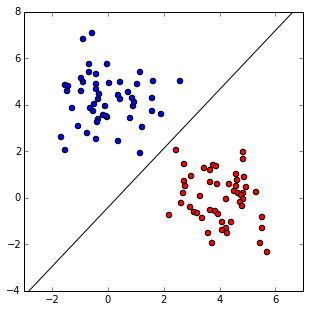

loss: 0.0546049326658, w norm: 1.42871725559


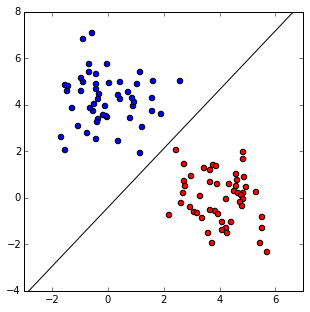

loss: 0.0543126277626, w norm: 1.43389630318


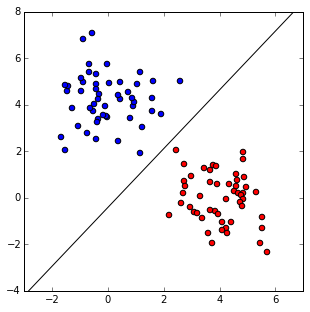

loss: 0.0540283955634, w norm: 1.43901193142


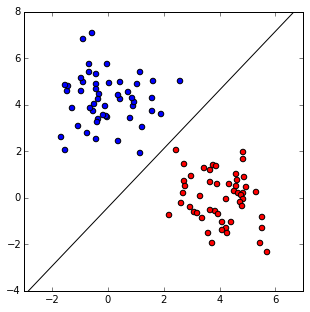

loss: 0.053751885891, w norm: 1.44406580925


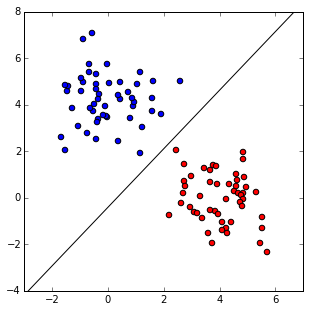

loss: 0.0534827746451, w norm: 1.44905912876


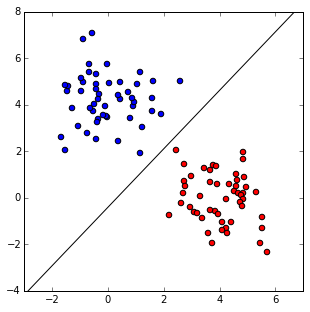

loss: 0.0532207377255, w norm: 1.45399320126


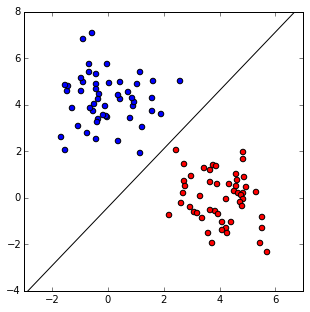

loss: 0.0529654882848, w norm: 1.45886945724


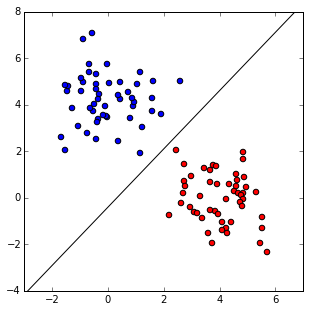

loss: 0.0527167469263, w norm: 1.46368944645


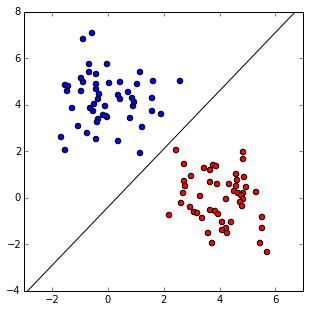

loss: 0.0524742491543, w norm: 1.46845412254


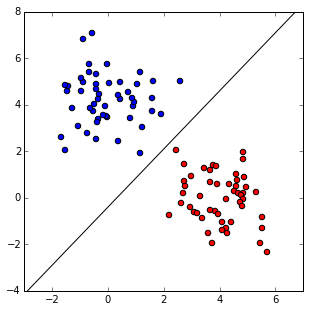

loss: 0.052237752825, w norm: 1.47316467762


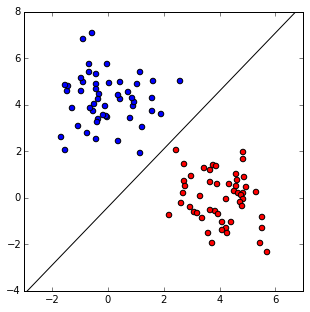

loss: 0.0520070418715, w norm: 1.47782230377


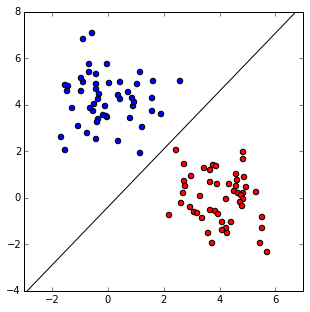

loss: 0.05178187415, w norm: 1.48242819309


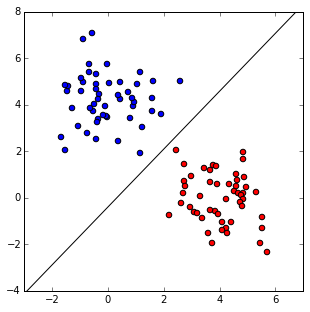

loss: 0.0515620484948, w norm: 1.48698353767


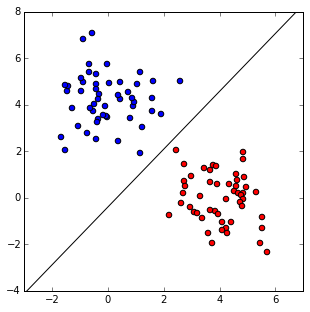

loss: 0.0513473749161, w norm: 1.49148929119


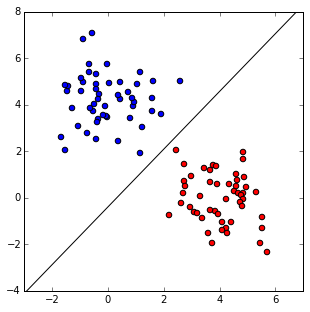

loss: 0.0511376596987, w norm: 1.49594640732


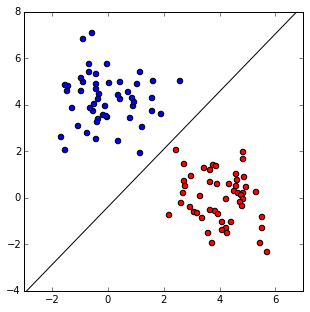

loss: 0.0509327314794, w norm: 1.50035595894


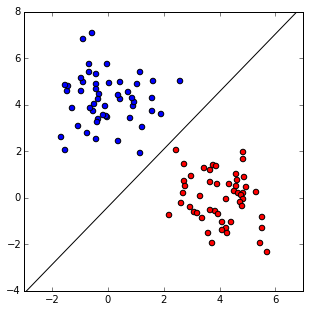

loss: 0.0507324263453, w norm: 1.50471878052


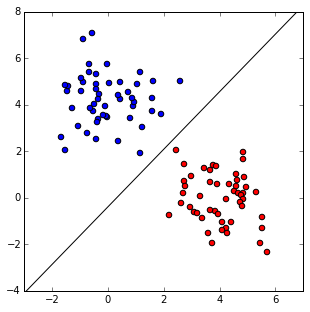

loss: 0.0505365766585, w norm: 1.50903606415


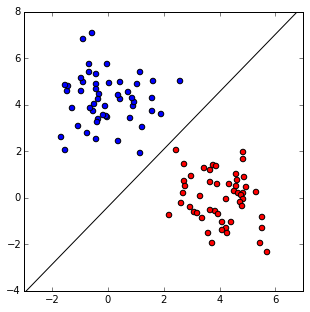

loss: 0.0503450408578, w norm: 1.51330840588


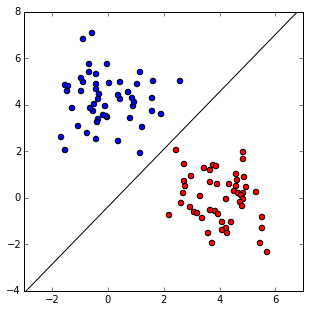

loss: 0.0501576624811, w norm: 1.5175369978


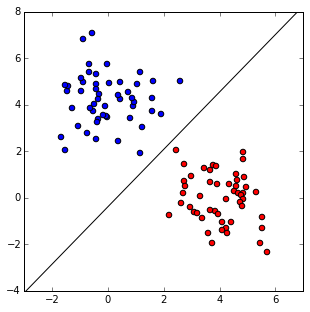

loss: 0.0499743148685, w norm: 1.52172243595


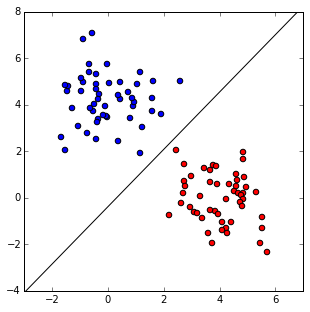

loss: 0.0497948564589, w norm: 1.52586555481


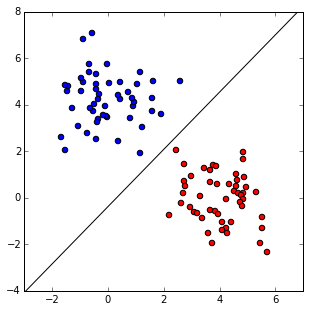

loss: 0.0496191754937, w norm: 1.52996742725


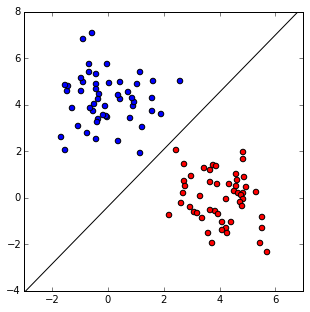

loss: 0.0494471378624, w norm: 1.53402864933


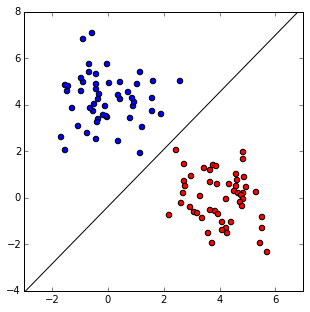

loss: 0.0492786429822, w norm: 1.53804993629


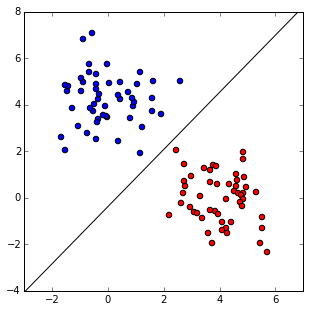

loss: 0.0491135641932, w norm: 1.54203224182


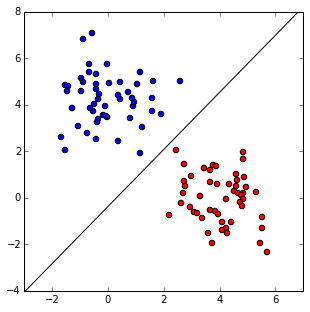

loss: 0.0489518158138, w norm: 1.54597592354


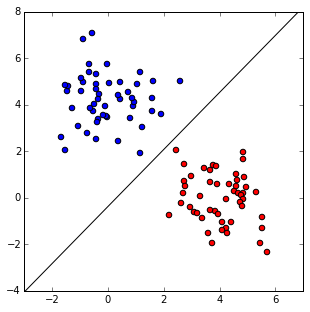

loss: 0.0487932823598, w norm: 1.54988193512


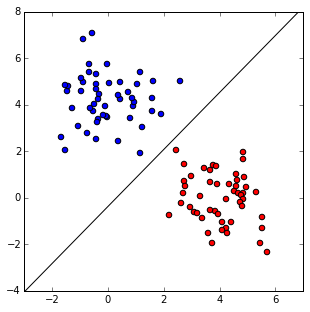

loss: 0.048637881875, w norm: 1.55375111103


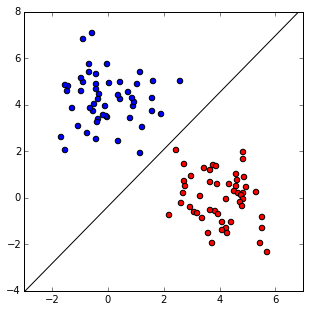

loss: 0.0484855100513, w norm: 1.5575838089


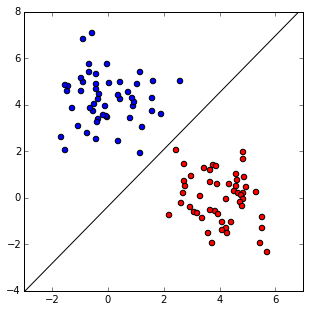

loss: 0.0483360812068, w norm: 1.56138086319


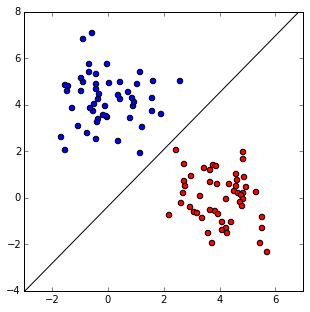

loss: 0.0481895059347, w norm: 1.56514275074


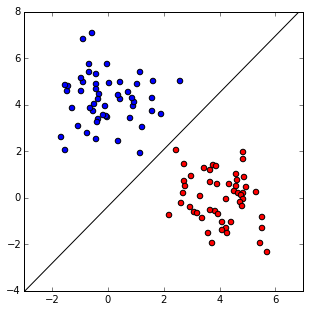

loss: 0.0480457246304, w norm: 1.56887018681


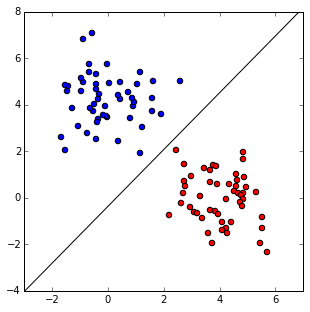

loss: 0.0479046292603, w norm: 1.57256364822


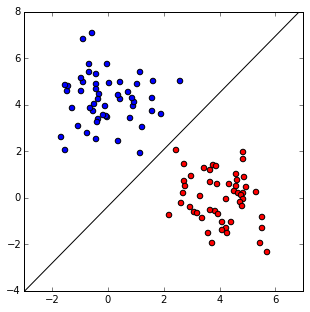

loss: 0.0477661676705, w norm: 1.57622385025


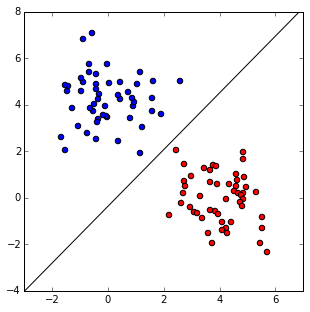

loss: 0.0476302579045, w norm: 1.57985138893


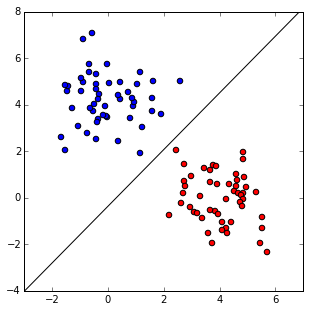

loss: 0.0474968254566, w norm: 1.58344662189


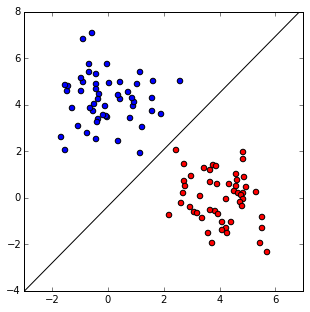

loss: 0.0473658144474, w norm: 1.5870102644


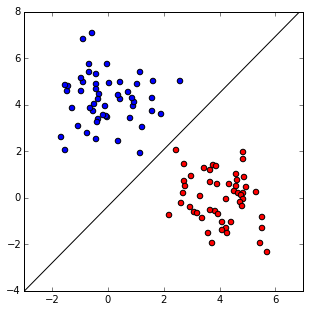

loss: 0.0472371503711, w norm: 1.59054279327


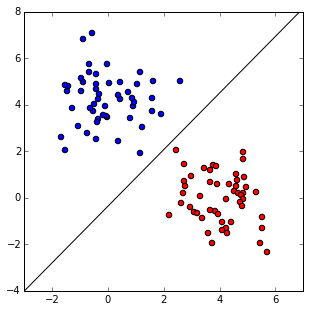

loss: 0.0471107810736, w norm: 1.59404468536


In [19]:
for epoch in xrange(100):
    loss_val = train()
    draw_state()
    print('loss: {}, w norm: {}'.format(loss_val, np.sqrt(np.sum(w.get_value()**2))))
# calc = theano.function([], -(T.dot(x, w)+b)*T.reshape(y,(-1,1)), givens=[(x,shared_x),(y,shared_y)])
# calc()